<a href="https://colab.research.google.com/github/matteobalducci/Startup_Analysis/blob/main/Matteo_Balducci_Startup_Analysis_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.15.x Final Assignment

### Assignment Instructions

#### Part 1   |   Standard Difficulty Level

In this first part, you will be working with a datasets containing information of over 20k Software Professionals with different variables like:

- the `Rating` of the company given by the employee,
- the `Company Name`,
- the `Job Title` of the employee,
- the employee `Salary` (in Indian Rupee ₹),
- the number of `Salaries Reported`,
- the `Location` of the company,
- the `Employment Status` and
- the category of the `Job Roles`

The dataset name is `Software Professionals Salary.csv` and you will find it in the `data` folder of this repository. At [this link](https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022?search=salary) you can find the source of the data (Kaggle) as well as more information on its composition.

**Setup:** Import the necessary libraries and load the .csv file to a DataFrame named `sps`. Check that all columns have the correct data type.

In [ ]:
import pandas as pd

# Mount Google Drive if the file is stored in Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the CSV file into a DataFrame
data_path = "/content/drive/MyDrive/Software Professionals Salary.csv"  # Replace with the actual file path
sps = pd.read_csv(data_path)

# Check the data types of all columns
print(sps.dtypes)


Mounted at /content/drive
Rating               float64
Company Name          object
Job Title             object
Salary                 int64
Salaries Reported      int64
Location              object
Employment Status     object
Job Roles             object
dtype: object


1. What is the shape (rows, cols) of the `sps` DataFrame?

In [ ]:
print(sps.shape)


(22770, 8)


2. How many unique `Job Roles` are there in the dataset?

In [ ]:
unique_job_roles = sps['Job Roles'].nunique()
print(unique_job_roles)


11


3. How many unique `Job Title` are there for the "Python" `Job Role`?

In [ ]:
# Filter the DataFrame for rows with "Python" job role
python_jobs = sps[sps['Job Roles'] == 'Python']

# Calculate the number of unique job titles
unique_job_titles = python_jobs['Job Title'].nunique()

print(unique_job_titles)


102


4. Of the `Company Name`s that are listed in the DataFrame, **how many** have a "Python" `Job Role` with a `Job Title` containing the **substring** "Analyst"?

In [ ]:
# Filter the DataFrame for rows with "Python" job role and job title containing "Analyst"
python_analyst_jobs = sps[(sps['Job Roles'] == 'Python') & sps['Job Title'].str.contains('Analyst')]

# Get the unique company names from the filtered DataFrame
unique_company_names = python_analyst_jobs['Company Name'].nunique()

print(unique_company_names)


3


5. Which `Company Name` has the highest number of `Salaries Reported` (across all `Job Title`s)?

In [ ]:
# Group the DataFrame by "Company Name" and calculate the sum of "Salaries Reported" for each group
company_salaries = sps.groupby('Company Name')['Salaries Reported'].sum()

# Find the company name with the maximum sum of salaries reported
company_with_max_salaries = company_salaries.idxmax()

print(company_with_max_salaries)


Amazon


6. Given the `Company Name` you found at the previous question, how many `Location`s is this company present in?

In [ ]:
# Filter the DataFrame for rows with the company name with the highest number of salaries reported
company_max_salaries = sps[sps['Company Name'] == company_with_max_salaries]

# Count the number of unique locations for the filtered company
unique_locations = company_max_salaries['Location'].nunique()

print(unique_locations)


9


7. As you may have noticed, the `Salary` is reported in Indian Rupees (ISO code: INR). Using the [Open Access Endpoint](https://www.exchangerate-api.com/docs/free) (no API Key required) of the ExchangeRate-API service, create a new column named `Salary USD` containing the salary-equivalent in USD and round the result to zero decimals. What is the conversion rate between USD-INR at the time of your execution? *Note: of course, this result will change in time*

In [ ]:
import requests

# Make the API request to get the exchange rate
response = requests.get('https://api.exchangerate-api.com/v4/latest/USD')
exchange_rates = response.json()

# Get the conversion rate for USD to INR
usd_to_inr = exchange_rates['rates']['INR']

# Create a new column "Salary USD" by converting the "Salary" column to USD
sps['Salary USD'] = sps['Salary'] / usd_to_inr
sps['Salary USD'] = sps['Salary USD'].round(0)

# Print the conversion rate between USD-INR
print(f"Conversion rate between USD-INR: 1 USD = {usd_to_inr} INR")


Conversion rate between USD-INR: 1 USD = 82.64 INR


8. What is the average `Salary USD` for the "Python" `Job Role`?

In [ ]:
# Filter the DataFrame for rows with "Python" job role
python_jobs = sps[sps['Job Roles'] == 'Python']

# Calculate the average salary in USD for the filtered job role
average_salary_usd = python_jobs['Salary USD'].mean()

print(average_salary_usd)


5881.083421330517


9. Which `Company Name` has the highest **average** `Salary EUR` across all `Job Title`s?

In [ ]:
# Group the DataFrame by "Company Name" and calculate the average of "Salary" for each group
company_average_salary_eur = sps.groupby('Company Name')['Salary'].mean()

# Find the company name with the maximum average salary in EUR
company_with_highest_average_salary = company_average_salary_eur.idxmax()

print(company_with_highest_average_salary)


Thapar University


10. Create a Plot that shows the **relationship** between the average `Salary EUR` and the average `Rating` for each `Company Name`. Do you see any anomaly in the plot? Which is the `Company Name` that is causing this oddity?

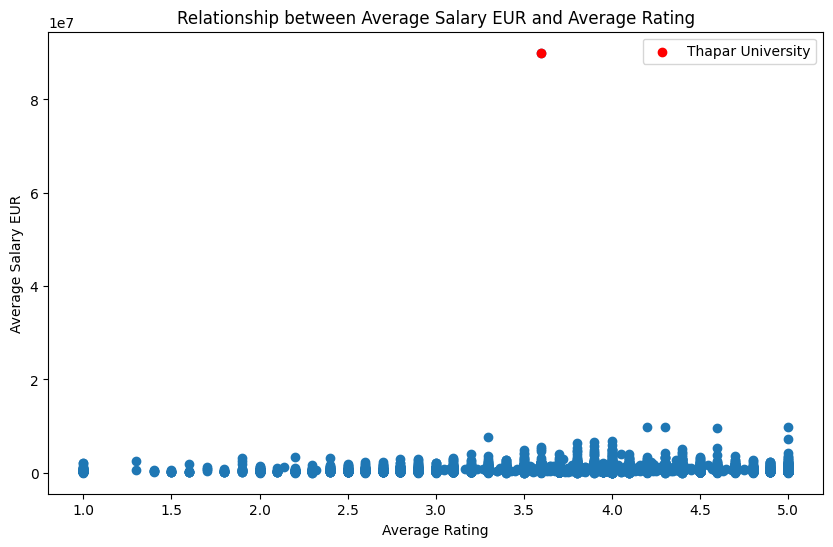

In [ ]:
import matplotlib.pyplot as plt

# Group the DataFrame by "Company Name" and calculate the average of "Salary EUR" and "Rating" for each group
company_avg_salary_rating = sps.groupby('Company Name').agg({'Salary': 'mean', 'Rating': 'mean'})

# Plot the relationship between average Salary EUR and average Rating
plt.figure(figsize=(10, 6))
plt.scatter(company_avg_salary_rating['Rating'], company_avg_salary_rating['Salary'])
plt.xlabel('Average Rating')
plt.ylabel('Average Salary EUR')
plt.title('Relationship between Average Salary EUR and Average Rating')

# Find the company name with the highest average salary and highlight it on the plot
company_with_highest_avg_salary = company_avg_salary_rating['Salary'].idxmax()
highest_avg_salary = company_avg_salary_rating.loc[company_with_highest_avg_salary, 'Salary']
highest_avg_rating = company_avg_salary_rating.loc[company_with_highest_avg_salary, 'Rating']
plt.scatter(highest_avg_rating, highest_avg_salary, color='red', label=company_with_highest_avg_salary)
plt.legend()

plt.show()


